# Add libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.decomposition import FactorAnalysis
from imblearn.over_sampling import RandomOverSampler 
from numpy import sqrt, abs, round
from scipy.stats import norm
sns.set_style('darkgrid')

In [139]:
data = pd.read_csv('diabetes.csv')
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

# E D A : Exploratory Data Analysis

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [141]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [142]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [143]:
data.notnull().sum()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [144]:
#We have unbalanced data
data.groupby('Outcome').size() / len(data)

Outcome
0    0.651042
1    0.348958
dtype: float64

# Data Visualization

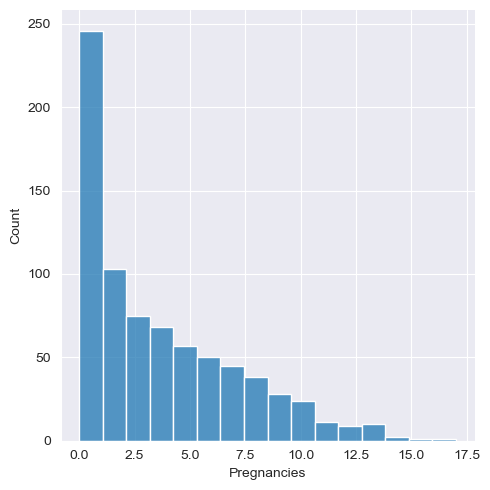

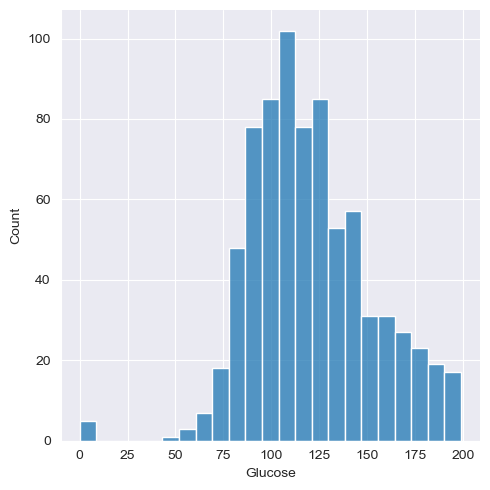

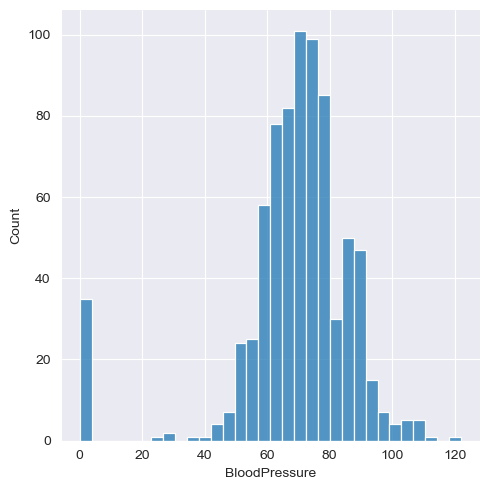

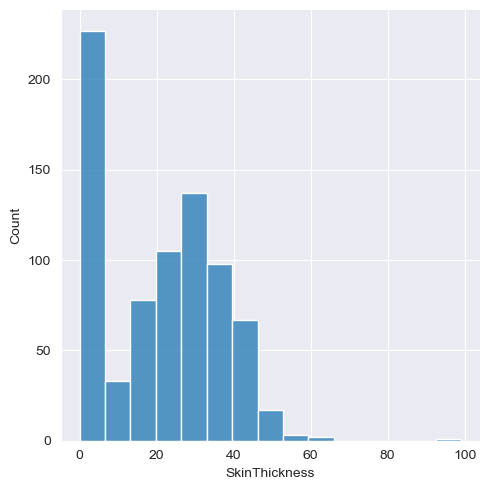

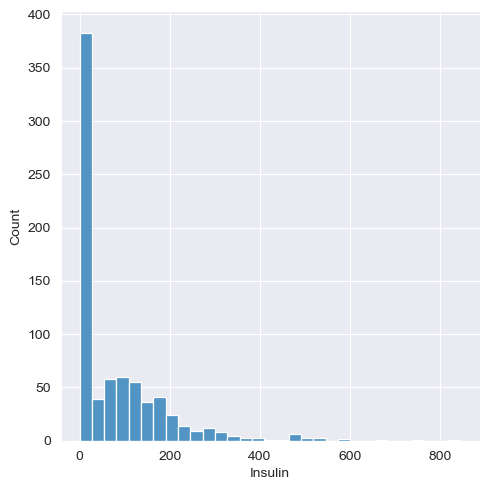

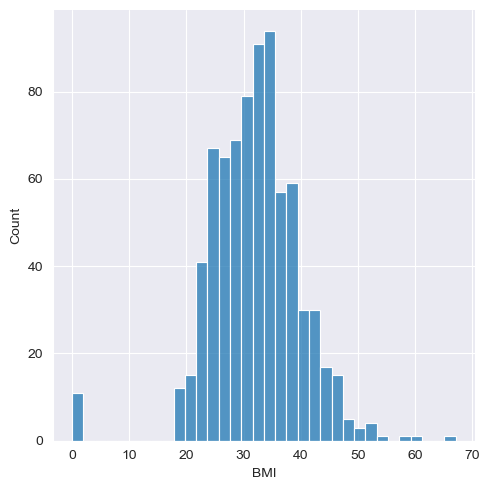

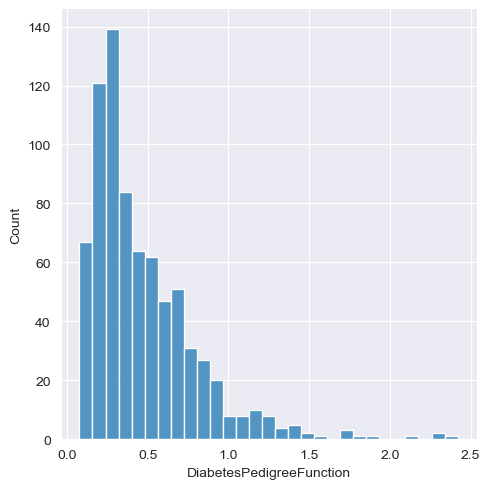

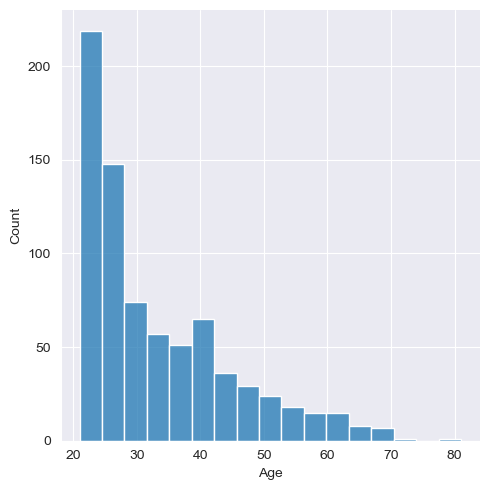

In [145]:
#UNIVARIATE
def histogram(value, data=data):
    diagram = sns.displot(x=value, data=data, )
    plt.show()
    return diagram
histogram('Pregnancies')
histogram('Glucose')
histogram('BloodPressure')
histogram('SkinThickness')
histogram('Insulin') 
histogram('BMI')
histogram('DiabetesPedigreeFunction')
histogram('Age')


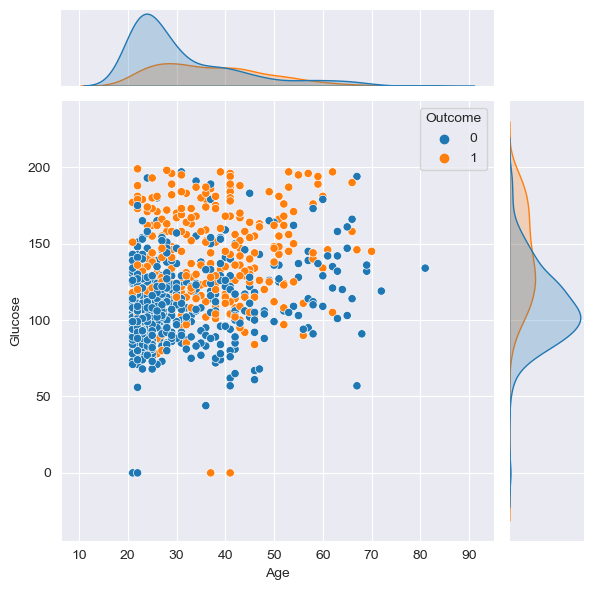

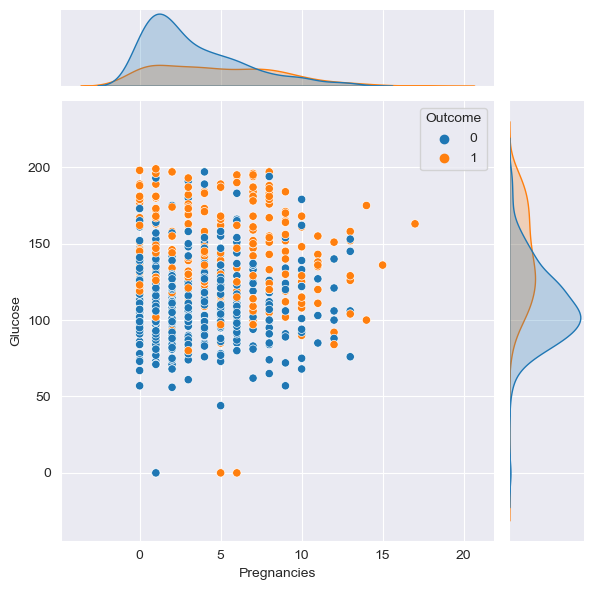

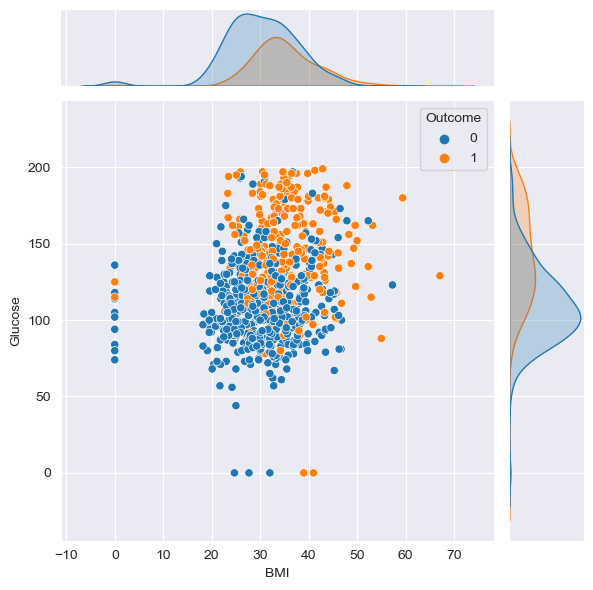

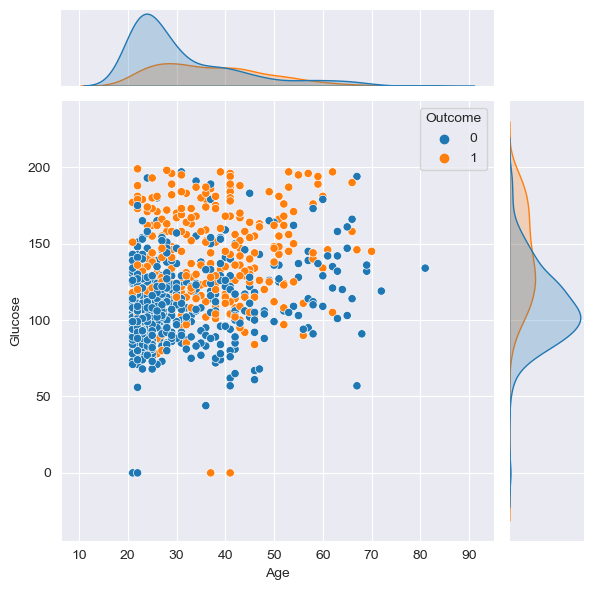

In [146]:
sns.jointplot(data=data, x='Age' ,y='Glucose', hue='Outcome')
plt.show()
sns.jointplot(data=data, x='Pregnancies' ,y='Glucose', hue='Outcome')
plt.show()
sns.jointplot(data=data, x='BMI' ,y='Glucose', hue='Outcome')
plt.show()
sns.jointplot(data=data, x='Age' ,y='Glucose', hue='Outcome')

In [147]:
corr = data.corr()
corr

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

<AxesSubplot:>

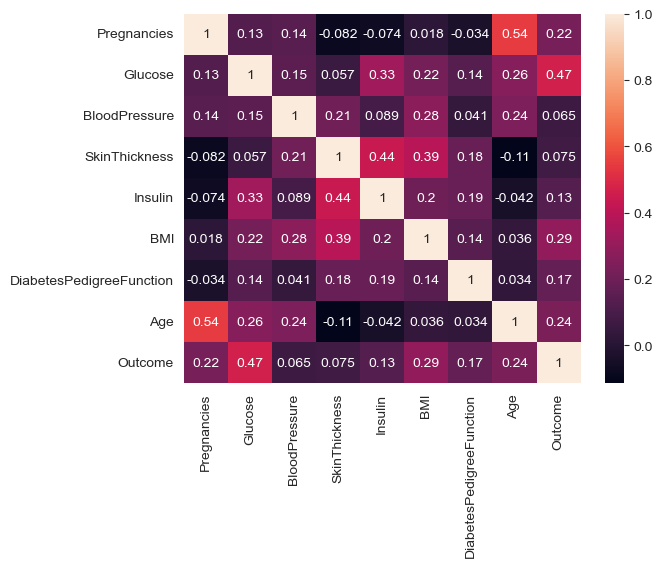

In [148]:
sns.heatmap(corr, annot=True)

In [149]:
data.Age.unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [150]:
bins= [20,30,40,50,60,70,80,90]
labels=['20-30','30-40','40-50','50-60','60-70','70-80','80-90']
data['AgeCat'] = pd.cut(data['Age'], bins , labels=labels)

In [151]:
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome AgeCat  
0                       0.627   50        1  40-50  
1                       0.351   31        0  30-40  
2                       0.672   32        1  30-40  
3                       0.167   21        0  20-30  
4                       2.288   33        1  30-40  
..                        ...  ...      ...    ...  
763                     0.171   63        0  60-70  
764                     0.340   27        0  20-30  
765                     0.245   30        0  20-30  
766                     0.349   47        1  40-50  
767                     0.315   23        0  20-30  

[768 rows x 10 columns]

In [152]:
dt=data.groupby(by=['AgeCat', 'Outcome']).size().reset_index(name = 'count1')
dt

AgeCat  Outcome  count1
0   20-30        0     327
1   20-30        1      90
2   30-40        0      81
3   30-40        1      76
4   40-50        0      49
5   40-50        1      64
6   50-60        0      23
7   50-60        1      31
8   60-70        0      18
9   60-70        1       7
10  70-80        0       1
11  70-80        1       0
12  80-90        0       1
13  80-90        1       0

<AxesSubplot:xlabel='Outcome', ylabel='count1'>

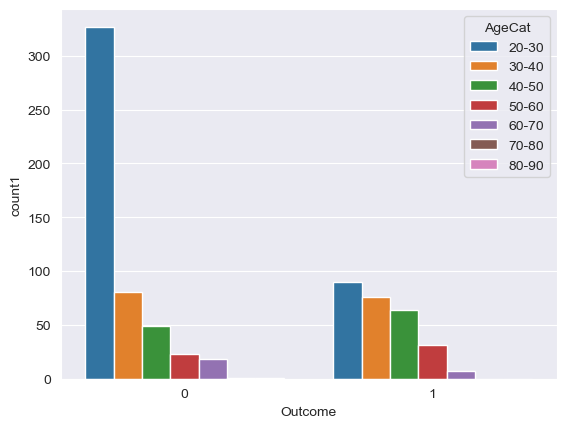

In [153]:
sns.barplot(data=dt , x='Outcome',y='count1', hue='AgeCat')

<AxesSubplot:xlabel='AgeCat', ylabel='BMI'>

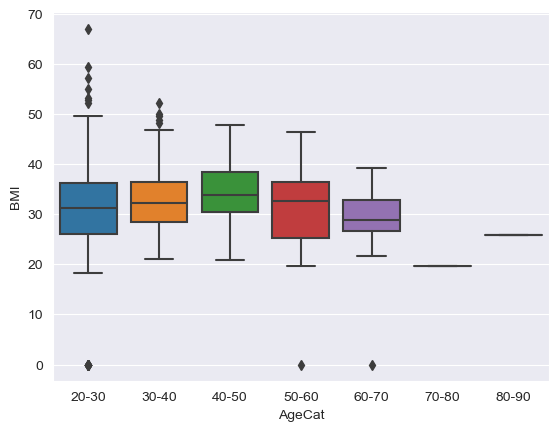

In [154]:
sns.boxplot(data=data, x='AgeCat', y='BMI')

<AxesSubplot:xlabel='AgeCat', ylabel='Glucose'>

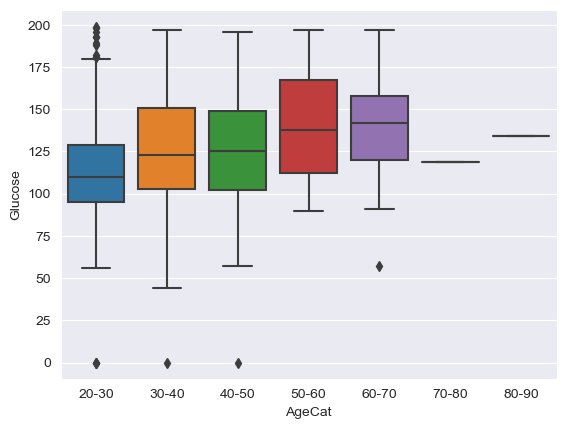

In [155]:
sns.boxplot(data=data, x='AgeCat', y='Glucose')

<AxesSubplot:xlabel='AgeCat', ylabel='BloodPressure'>

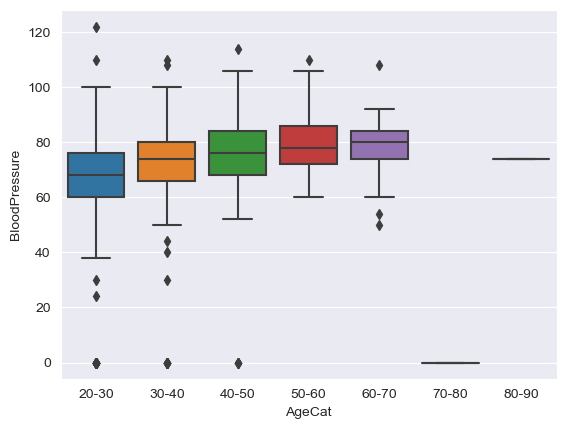

In [156]:
 sns.boxplot(data=data, x='AgeCat', y='BloodPressure')

# Data Preprocessing

In [157]:
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome AgeCat  
0                       0.627   50        1  40-50  
1                       0.351   31        0  30-40  
2                       0.672   32        1  30-40  
3                       0.167   21        0  20-30  
4                       2.288   33        1  30-40  
..                        ...  ...      ...    ...  
763                     0.171   63        0  60-70  
764                     0.340   27        0  20-30  
765                     0.245   30        0  20-30  
766                     0.349   47        1  40-50  
767                     0.315   23        0  20-30  

[768 rows x 10 columns]

In [158]:
data[data['BMI']==0]
data[data['Insulin']==0]
data[data['SkinThickness']==0]
data[data['BloodPressure']==0]
#data[data['Glucose']==0]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
7             10      115              0              0        0  35.3   
15             7      100              0              0        0  30.0   
49             7      105              0              0        0   0.0   
60             2       84              0              0        0   0.0   
78             0      131              0              0        0  43.2   
81             2       74              0              0        0   0.0   
172            2       87              0             23        0  28.9   
193           11      135              0              0        0  52.3   
222            7      119              0              0        0  25.2   
261            3      141              0              0        0  30.0   
266            0      138              0              0        0  36.3   
269            2      146              0              0        0  27.5   
300            0      167              0              0        0  32.3   
332            1      180              0              0        0  43.3   
336            0      117              0              0        0  33.8   
347            3      116              0              0        0  23.5   
357           13      129              0             30        0  39.9   
426            0       94              0              0        0   0.0   
430            2       99              0              0        0  22.2   
435            0      141              0              0        0  42.4   
453            2      119              0              0        0  19.6   
468            8      120              0              0        0  30.0   
484            0      145              0              0        0  44.2   
494            3       80              0              0        0   0.0   
522            6      114              0              0        0   0.0   
533            6       91              0              0        0  29.8   
535            4      132              0              0        0  32.9   
589            0       73              0              0        0  21.1   
601            6       96              0              0        0  23.7   
604            4      183              0              0        0  28.4   
619            0      119              0              0        0  32.4   
643            4       90              0              0        0  28.0   
697            0       99              0              0        0  25.0   
703            2      129              0              0        0  38.5   
706           10      115              0              0        0   0.0   

     DiabetesPedigreeFunction  Age  Outcome AgeCat  
7                       0.134   29        0  20-30  
15                      0.484   32        1  30-40  
49                      0.305   24        0  20-30  
60                      0.304   21        0  20-30  
78                      0.270   26        1  20-30  
81                      0.102   22        0  20-30  
172                     0.773   25        0  20-30  
193                     0.578   40        1  30-40  
222                     0.209   37        0  30-40  
261                     0.761   27        1  20-30  
266                     0.933   25        1  20-30  
269                     0.240   28        1  20-30  
300                     0.839   30        1  20-30  
332                     0.282   41        1  40-50  
336                     0.932   44        0  40-50  
347                     0.187   23        0  20-30  
357                     0.569   44        1  40-50  
426                     0.256   25        0  20-30  
430                     0.108   23        0  20-30  
435                     0.205   29        1  20-30  
453                     0.832   72        0  70-80  
468                     0.183   38        1  30-40  
484                     0.630   31        1  30-40  
494                     0.174   22        0  20-30  
522            

In [159]:
data.replace({'BMI':0, 'Insulin':0, 'SkinThickness':0, 'BloodPressure':0}, np.nan, inplace=True)

In [160]:
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148           72.0           35.0      NaN  33.6   
1              1       85           66.0           29.0      NaN  26.6   
2              8      183           64.0            NaN      NaN  23.3   
3              1       89           66.0           23.0     94.0  28.1   
4              0      137           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101           76.0           48.0    180.0  32.9   
764            2      122           70.0           27.0      NaN  36.8   
765            5      121           72.0           23.0    112.0  26.2   
766            1      126           60.0            NaN      NaN  30.1   
767            1       93           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome AgeCat  
0                       0.627   50        1  40-50  
1                       0.351   31        0  30-40  
2                       0.672   32        1  30-40  
3                       0.167   21        0  20-30  
4                       2.288   33        1  30-40  
..                        ...  ...      ...    ...  
763                     0.171   63        0  60-70  
764                     0.340   27        0  20-30  
765                     0.245   30        0  20-30  
766                     0.349   47        1  40-50  
767                     0.315   23        0  20-30  

[768 rows x 10 columns]

In [161]:
SI = SimpleImputer(missing_values=np.nan, strategy='median')
data.iloc[:, 2:6]=SI.fit_transform(data.iloc[:, 2:6])

In [162]:
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148           72.0           35.0    125.0  33.6   
1              1       85           66.0           29.0    125.0  26.6   
2              8      183           64.0           29.0    125.0  23.3   
3              1       89           66.0           23.0     94.0  28.1   
4              0      137           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101           76.0           48.0    180.0  32.9   
764            2      122           70.0           27.0    125.0  36.8   
765            5      121           72.0           23.0    112.0  26.2   
766            1      126           60.0           29.0    125.0  30.1   
767            1       93           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome AgeCat  
0                       0.627   50        1  40-50  
1                       0.351   31        0  30-40  
2                       0.672   32        1  30-40  
3                       0.167   21        0  20-30  
4                       2.288   33        1  30-40  
..                        ...  ...      ...    ...  
763                     0.171   63        0  60-70  
764                     0.340   27        0  20-30  
765                     0.245   30        0  20-30  
766                     0.349   47        1  40-50  
767                     0.315   23        0  20-30  

[768 rows x 10 columns]

In [163]:
X = data.iloc[:, :8]
Y = data['Outcome']

In [164]:
X

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148           72.0           35.0    125.0  33.6   
1              1       85           66.0           29.0    125.0  26.6   
2              8      183           64.0           29.0    125.0  23.3   
3              1       89           66.0           23.0     94.0  28.1   
4              0      137           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101           76.0           48.0    180.0  32.9   
764            2      122           70.0           27.0    125.0  36.8   
765            5      121           72.0           23.0    112.0  26.2   
766            1      126           60.0           29.0    125.0  30.1   
767            1       93           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

In [165]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Equalization Classes


In [166]:
ROS = RandomOverSampler()
X, Y = ROS.fit_resample(X, Y)

In [167]:
np.unique(Y, return_counts= True)

(array([0, 1], dtype=int64), array([500, 500], dtype=int64))

In [168]:
norm2 = MinMaxScaler()
X.iloc[:, :] = norm2.fit_transform(X.iloc[:, :])
X

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.489796       0.304348  0.133413  0.314928   
1       0.058824  0.427136       0.428571       0.239130  0.133413  0.171779   
2       0.470588  0.919598       0.408163       0.239130  0.133413  0.104294   
3       0.058824  0.447236       0.428571       0.173913  0.096154  0.202454   
4       0.000000  0.688442       0.163265       0.304348  0.185096  0.509202   
..           ...       ...            ...            ...       ...       ...   
995     0.117647  0.778894       0.285714       0.217391  0.632212  0.419223   
996     0.058824  0.819095       0.489796       0.239130  0.133413  0.425358   
997     0.000000  0.527638       0.612245       0.239130  0.133413  0.198364   
998     0.000000  0.899497       0.673469       0.217391  0.133413  0.529652   
999     0.000000  0.904523       0.551020       0.608696  0.000000  0.842536   

     DiabetesPedigreeFunction       Age  
0                    0.234415  0.483333  
1                    0.116567  0.166667  
2                    0.253629  0.183333  
3                    0.038002  0.000000  
4                    0.943638  0.200000  
..                        ...       ...  
995                  0.069172  0.066667  
996                  0.488471  0.200000  
997                  0.283091  0.683333  
998                  0.259607  0.033333  
999                  1.000000  0.066667  

[1000 rows x 8 columns]

# Creat Lazy Machine learning Model /  Classification

In [169]:
xtrain, xtest, ytrain, ytest=train_test_split(X, Y, test_size=0.2, random_state=442)
xtrain

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
995     0.117647  0.778894       0.285714       0.217391  0.632212  0.419223   
311     0.000000  0.532663       0.469388       0.326087  0.161058  0.433538   
737     0.470588  0.326633       0.489796       0.173913  0.133413  0.282209   
457     0.294118  0.432161       0.448980       0.228261  0.068510  0.245399   
138     0.000000  0.648241       0.571429       0.239130  0.133413  0.265849   
..           ...       ...            ...            ...       ...       ...   
969     0.411765  0.648241       0.448980       0.456522  0.133413  0.415133   
708     0.529412  0.824121       0.551020       0.239130  0.133413  0.298569   
941     0.235294  0.919598       0.489796       0.239130  0.133413  0.208589   
492     0.235294  0.497487       0.448980       0.336957  0.133413  0.298569   
866     0.117647  0.527638       0.571429       0.413043  0.212740  0.316973   

     DiabetesPedigreeFunction       Age  
995                  0.069172  0.066667  
311                  0.225021  0.016667  
737                  0.222886  0.350000  
457                  0.122118  0.050000  
138                  0.266866  0.133333  
..                        ...       ...  
969                  0.154142  0.366667  
708                  0.029889  0.400000  
941                  0.057216  0.250000  
492                  0.028608  0.200000  
866                  0.270282  0.133333  

[800 rows x 8 columns]

In [170]:
SVCM = SVC(kernel='rbf', random_state=4114, verbose=True)
SVCM.fit( xtrain, ytrain)

[LibSVM]

SVC(random_state=4114, verbose=True)

In [171]:
ypred = SVCM.predict(xtest)

In [172]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78        99
           1       0.77      0.81      0.79       101

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.79      0.78       200



In [173]:
print(confusion_matrix(ytest, ypred))

[[75 24]
 [19 82]]


# KNN

In [174]:
KNN_M=KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree')
KNN_M.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)

In [175]:
ypred_1 = KNN_M.predict(xtest)

D:\anaconda\install\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [176]:
print(classification_report(ytest, ypred_1))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        99
           1       0.74      0.83      0.79       101

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



# CatBoostClassifier

In [177]:
cat = CatBoostClassifier(iterations=2000, learning_rate=0.05, depth=10, random_state=1212, verbose=10,
                         eval_metric='PRAUC')

In [178]:
cat.fit(xtrain, ytrain, eval_set=(xtest, ytest), plot=True, )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8935209	test: 0.7859268	best: 0.7859268 (0)	total: 188ms	remaining: 6m 16s
10:	learn: 0.9541259	test: 0.8696926	best: 0.8771538 (8)	total: 306ms	remaining: 55.3s
20:	learn: 0.9753003	test: 0.8755259	best: 0.8830924 (14)	total: 461ms	remaining: 43.5s
30:	learn: 0.9845150	test: 0.8677348	best: 0.8830924 (14)	total: 603ms	remaining: 38.3s
40:	learn: 0.9905051	test: 0.8690529	best: 0.8830924 (14)	total: 737ms	remaining: 35.2s
50:	learn: 0.9938135	test: 0.8766644	best: 0.8830924 (14)	total: 870ms	remaining: 33.2s
60:	learn: 0.9963882	test: 0.8812206	best: 0.8830924 (14)	total: 1s	remaining: 31.9s
70:	learn: 0.9975332	test: 0.8837411	best: 0.8843462 (69)	total: 1.14s	remaining: 30.9s
80:	learn: 0.9985919	test: 0.8822388	best: 0.8843462 (69)	total: 1.28s	remaining: 30.3s
90:	learn: 0.9994012	test: 0.8777418	best: 0.8843462 (69)	total: 1.41s	remaining: 29.5s
100:	learn: 0.9995982	test: 0.8845300	best: 0.8855181 (96)	total: 1.53s	remaining: 28.8s
110:	learn: 0.9998060	test: 0.878909

920:	learn: 1.0000000	test: 0.8915037	best: 0.8932418 (749)	total: 11.9s	remaining: 14s
930:	learn: 1.0000000	test: 0.8918176	best: 0.8932418 (749)	total: 12.1s	remaining: 13.8s
940:	learn: 1.0000000	test: 0.8918746	best: 0.8932418 (749)	total: 12.2s	remaining: 13.7s
950:	learn: 1.0000000	test: 0.8920659	best: 0.8932418 (749)	total: 12.3s	remaining: 13.6s
960:	learn: 1.0000000	test: 0.8922048	best: 0.8932418 (749)	total: 12.5s	remaining: 13.5s
970:	learn: 1.0000000	test: 0.8921143	best: 0.8932418 (749)	total: 12.6s	remaining: 13.3s
980:	learn: 1.0000000	test: 0.8919333	best: 0.8932418 (749)	total: 12.7s	remaining: 13.2s
990:	learn: 1.0000000	test: 0.8918555	best: 0.8932418 (749)	total: 12.8s	remaining: 13.1s
1000:	learn: 1.0000000	test: 0.8918555	best: 0.8932418 (749)	total: 12.9s	remaining: 12.9s
1010:	learn: 1.0000000	test: 0.8926387	best: 0.8932418 (749)	total: 13.1s	remaining: 12.8s
1020:	learn: 1.0000000	test: 0.8930139	best: 0.8932418 (749)	total: 13.2s	remaining: 12.7s
1030:	lea

1820:	learn: 1.0000000	test: 0.8946265	best: 0.8949443 (1372)	total: 23.8s	remaining: 2.34s
1830:	learn: 1.0000000	test: 0.8945814	best: 0.8949443 (1372)	total: 23.9s	remaining: 2.21s
1840:	learn: 1.0000000	test: 0.8945814	best: 0.8949443 (1372)	total: 24.1s	remaining: 2.08s
1850:	learn: 1.0000000	test: 0.8945175	best: 0.8949443 (1372)	total: 24.2s	remaining: 1.95s
1860:	learn: 1.0000000	test: 0.8945814	best: 0.8949443 (1372)	total: 24.3s	remaining: 1.82s
1870:	learn: 1.0000000	test: 0.8947057	best: 0.8949443 (1372)	total: 24.5s	remaining: 1.69s
1880:	learn: 1.0000000	test: 0.8947406	best: 0.8949443 (1372)	total: 24.6s	remaining: 1.55s
1890:	learn: 1.0000000	test: 0.8947820	best: 0.8949443 (1372)	total: 24.7s	remaining: 1.42s
1900:	learn: 1.0000000	test: 0.8948017	best: 0.8949443 (1372)	total: 24.9s	remaining: 1.29s
1910:	learn: 1.0000000	test: 0.8947566	best: 0.8949443 (1372)	total: 25s	remaining: 1.16s
1920:	learn: 1.0000000	test: 0.8947029	best: 0.8949443 (1372)	total: 25.1s	remaini

# AdaBoostClassifier

In [179]:
ada=AdaBoostClassifier(RandomForestClassifier(),n_estimators=100, learning_rate=0.6, random_state=1414, 
                       algorithm='SAMME', )

In [180]:
ada.fit(xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME', base_estimator=RandomForestClassifier(),
                   learning_rate=0.6, n_estimators=100, random_state=1414)

In [181]:
ypredd=ada.predict(xtest)

In [182]:
print(classification_report(ytest, ypredd))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84        99
           1       0.81      0.93      0.87       101

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



# RandomForestClassifier / GridSearch

In [183]:
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)
yrf = rf.predict(xtest)

In [184]:
print(classification_report(ytest, yrf))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        99
           1       0.82      0.93      0.87       101

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



In [185]:
params = {
    'n_estimators': [250, 300, 350],
    'criterion' : ('gini', 'entropy'),
    'max_depth' : [ 35, 40, 45, 50],
    
}
RGS=GridSearchCV(rf, params, scoring="f1", cv=5, verbose=10)

In [186]:
RGS.fit(xtrain, ytrain)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START criterion=gini, max_depth=35, n_estimators=250.............
[CV 1/5; 1/24] END criterion=gini, max_depth=35, n_estimators=250;, score=0.819 total time=   0.2s
[CV 2/5; 1/24] START criterion=gini, max_depth=35, n_estimators=250.............
[CV 2/5; 1/24] END criterion=gini, max_depth=35, n_estimators=250;, score=0.783 total time=   0.2s
[CV 3/5; 1/24] START criterion=gini, max_depth=35, n_estimators=250.............
[CV 3/5; 1/24] END criterion=gini, max_depth=35, n_estimators=250;, score=0.851 total time=   0.2s
[CV 4/5; 1/24] START criterion=gini, max_depth=35, n_estimators=250.............
[CV 4/5; 1/24] END criterion=gini, max_depth=35, n_estimators=250;, score=0.884 total time=   0.2s
[CV 5/5; 1/24] START criterion=gini, max_depth=35, n_estimators=250.............
[CV 5/5; 1/24] END criterion=gini, max_depth=35, n_estimators=250;, score=0.885 total time=   0.2s
[CV 1/5; 2/24] START criterion=gini, m

[CV 1/5; 10/24] END criterion=gini, max_depth=50, n_estimators=250;, score=0.838 total time=   0.2s
[CV 2/5; 10/24] START criterion=gini, max_depth=50, n_estimators=250............
[CV 2/5; 10/24] END criterion=gini, max_depth=50, n_estimators=250;, score=0.792 total time=   0.2s
[CV 3/5; 10/24] START criterion=gini, max_depth=50, n_estimators=250............
[CV 3/5; 10/24] END criterion=gini, max_depth=50, n_estimators=250;, score=0.839 total time=   0.2s
[CV 4/5; 10/24] START criterion=gini, max_depth=50, n_estimators=250............
[CV 4/5; 10/24] END criterion=gini, max_depth=50, n_estimators=250;, score=0.879 total time=   0.2s
[CV 5/5; 10/24] START criterion=gini, max_depth=50, n_estimators=250............
[CV 5/5; 10/24] END criterion=gini, max_depth=50, n_estimators=250;, score=0.896 total time=   0.2s
[CV 1/5; 11/24] START criterion=gini, max_depth=50, n_estimators=300............
[CV 1/5; 11/24] END criterion=gini, max_depth=50, n_estimators=300;, score=0.838 total time=   

[CV 1/5; 19/24] END criterion=entropy, max_depth=45, n_estimators=250;, score=0.833 total time=   0.2s
[CV 2/5; 19/24] START criterion=entropy, max_depth=45, n_estimators=250.........
[CV 2/5; 19/24] END criterion=entropy, max_depth=45, n_estimators=250;, score=0.785 total time=   0.2s
[CV 3/5; 19/24] START criterion=entropy, max_depth=45, n_estimators=250.........
[CV 3/5; 19/24] END criterion=entropy, max_depth=45, n_estimators=250;, score=0.854 total time=   0.3s
[CV 4/5; 19/24] START criterion=entropy, max_depth=45, n_estimators=250.........
[CV 4/5; 19/24] END criterion=entropy, max_depth=45, n_estimators=250;, score=0.862 total time=   0.3s
[CV 5/5; 19/24] START criterion=entropy, max_depth=45, n_estimators=250.........
[CV 5/5; 19/24] END criterion=entropy, max_depth=45, n_estimators=250;, score=0.880 total time=   0.3s
[CV 1/5; 20/24] START criterion=entropy, max_depth=45, n_estimators=300.........
[CV 1/5; 20/24] END criterion=entropy, max_depth=45, n_estimators=300;, score=0.

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [35, 40, 45, 50],
                         'n_estimators': [250, 300, 350]},
             scoring='f1', verbose=10)

In [187]:
RGS.best_params_

{'criterion': 'entropy', 'max_depth': 40, 'n_estimators': 350}

In [188]:
RGS.best_score_

0.8519108999795953

In [189]:
ypred = RGS.predict(xtest)

In [190]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86        99
           1       0.83      0.94      0.88       101

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200



In [191]:
print(confusion_matrix(ytest, ypred))

[[80 19]
 [ 6 95]]


# Hypothesis Testing  Z_test


In [192]:
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148           72.0           35.0    125.0  33.6   
1              1       85           66.0           29.0    125.0  26.6   
2              8      183           64.0           29.0    125.0  23.3   
3              1       89           66.0           23.0     94.0  28.1   
4              0      137           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101           76.0           48.0    180.0  32.9   
764            2      122           70.0           27.0    125.0  36.8   
765            5      121           72.0           23.0    112.0  26.2   
766            1      126           60.0           29.0    125.0  30.1   
767            1       93           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome AgeCat  
0                       0.627   50        1  40-50  
1                       0.351   31        0  30-40  
2                       0.672   32        1  30-40  
3                       0.167   21        0  20-30  
4                       2.288   33        1  30-40  
..                        ...  ...      ...    ...  
763                     0.171   63        0  60-70  
764                     0.340   27        0  20-30  
765                     0.245   30        0  20-30  
766                     0.349   47        1  40-50  
767                     0.315   23        0  20-30  

[768 rows x 10 columns]

<AxesSubplot:>

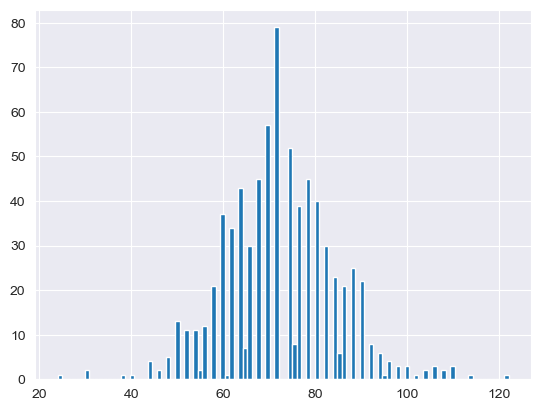

In [193]:
data.BloodPressure.hist(bins=100)

In [194]:
data.BloodPressure.describe()

count    768.000000
mean      72.386719
std       12.096642
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [195]:
data['BPR'] = data['BloodPressure'].apply(lambda x: 0 if x < 72 else 1)

In [196]:
DataA = data[data['BPR'] == 1]['Outcome']
DataB = data[data['BPR'] == 0]['Outcome']

In [197]:
aM=DataA.mean()

In [198]:
bM=DataB.mean()

In [199]:
stdA = DataA.std()
stdB = DataB.std()

In [200]:
cA = len(DataA) 
cB = len(DataB)

In [201]:
denominator = sqrt((stdA ** 2) / cA +( stdB ** 2) / cB )
denominator

0.03394411860003227

In [202]:
numerator = aM - bM
numerator

0.1353490929081913

In [203]:
result =numerator / denominator
result

3.987409262353409

In [204]:
P_VALUE =  2 * (1  - norm.cdf(abs(result)))
P_VALUE

6.679873912629475e-05

In [205]:
0.05 > 6.679873912629475e-05 
#we can refuse H0 

True